In [1]:
# Import the evprofiler package

from evprofiler.ev import EV, DrivableEV
from evprofiler.trip import Trip, DrivableTrip
from evprofiler.aggregator import Aggregator
from evprofiler.station import ChargingStation
from evprofiler.profile import Profile, Schedule, User

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
import pandas as pd
import datetime

In [2]:
# Create a list of EVs to use in the simulation

EVs = [EV(brand='Nissan', model='Leaf', battery_type='BEV', battery_size=59,
          charging_efficiency=0.9, discharging_efficiency=0.9,
          probability_in_population=0.16, energy_per_km=0.17, soc_min=0.8, soc_max=1.0),
       EV(brand='Tesla', model='Model 3', battery_type='BEV', battery_size=95,
          charging_efficiency=0.9, discharging_efficiency=0.9,
          probability_in_population=0.13, energy_per_km=0.18, soc_min=0.8, soc_max=1.0),
       EV(brand='Peugeot', model='e-Expert', battery_type='BEV', battery_size=68,
          charging_efficiency=0.9, discharging_efficiency=0.9,
          probability_in_population=0.1, energy_per_km=0.26, soc_min=0.8, soc_max=1.0),
       EV(brand='Renault', model='Zoe', battery_type='BEV', battery_size=52,
          charging_efficiency=0.9, discharging_efficiency=0.9,
          probability_in_population=0.1, energy_per_km=0.17, soc_min=0.8, soc_max=1.0),
       EV(brand='Jaguar', model='I-Pace', battery_type='BEV', battery_size=85,
          charging_efficiency=0.9, discharging_efficiency=0.9,
          probability_in_population=0.09, energy_per_km=0.22, soc_min=0.8, soc_max=1.0),
       EV(brand='Mercedes', model='E300', battery_type='PHEV', battery_size=13.5,
          charging_efficiency=0.9, discharging_efficiency=0.9,
          probability_in_population=0.08, energy_per_km=0.18, soc_min=0.8, soc_max=1.0),
       EV(brand='BMW', model='530e', battery_type='PHEV', battery_size=70.2,
          charging_efficiency=0.9, discharging_efficiency=0.9,
          probability_in_population=0.08, energy_per_km=0.16, soc_min=0.8, soc_max=1.0),
       EV(brand='Audi Q4', model='e-tron', battery_type='PHEV', battery_size=55,
          charging_efficiency=0.9, discharging_efficiency=0.9,
          probability_in_population=0.07, energy_per_km=0.17, soc_min=0.8, soc_max=1.0),
       EV(brand='Hyundai', model='Kauai', battery_type='BEV', battery_size=74,
          charging_efficiency=0.9, discharging_efficiency=0.9,
          probability_in_population=0.06, energy_per_km=0.192, soc_min=0.8, soc_max=1.0),
       EV(brand='Volvo', model='XC40', battery_type='PHEV', battery_size=78,
          charging_efficiency=0.9, discharging_efficiency=0.9,
          probability_in_population=0.05, energy_per_km=0.176, soc_min=0.8, soc_max=1.0),
       EV(brand='Wolkswagen', model='ID.3', battery_type='PHEV', battery_size=58,
          charging_efficiency=0.9, discharging_efficiency=0.9,
          probability_in_population=0.05, energy_per_km=0.155, soc_min=0.8, soc_max=1.0),
       EV(brand='Others', model='Others', battery_type='PEV', battery_size=20,
          charging_efficiency=0.9, discharging_efficiency=0.9,
          probability_in_population=0.03, energy_per_km=0.2, soc_min=0.8, soc_max=1.0)]

# Print the sum of the probabilities in the population of EVs
sum_of_probabilities = 0
for ev in EVs:
    sum_of_probabilities += ev.probability_in_population
print(sum_of_probabilities)

1.0


In [3]:
# Create a list of Charging Stations to use in the simulation

PUBLIC_STATIONS = [ChargingStation(charging_station_type='Public Ultrafast (150 kW)',
                                   charging_station_power=150,
                                   charging_station_efficiency=0.9,
                                   charging_station_cost=0.297,
                                   charging_station_probability=0.0233,
                                   color='orange'),
                   ChargingStation(charging_station_type='Public Fast (50 kW)',
                                   charging_station_power=50,
                                   charging_station_efficiency=0.9,
                                   charging_station_cost=0.297,
                                   charging_station_probability=0.434,
                                   color='red'),
                   ChargingStation(charging_station_type='Public Semi-fast (22 kW)',
                                   charging_station_power=22,
                                   charging_station_efficiency=0.9,
                                   charging_station_cost=0.297,
                                   charging_station_probability=0.4394,
                                   color='blue'),
                   ChargingStation(charging_station_type='Public Slow (7.2 kW)',
                                   charging_station_power=7.2,
                                   charging_station_efficiency=0.9,
                                   charging_station_cost=0.297,
                                   charging_station_probability=0.1033,
                                   color='green')]

PRIVATE_STATIONS = [ChargingStation(charging_station_type='Private Fast (50 kW)',
                                    charging_station_power=50,
                                    charging_station_efficiency=0.9,
                                    charging_station_cost=0.297,
                                    charging_station_probability=0.0405,
                                    color='purple'),
                    ChargingStation(charging_station_type='Private Semi-fast (22 kW)',
                                    charging_station_power=22,
                                    charging_station_efficiency=0.9,
                                    charging_station_cost=0.297,
                                    charging_station_probability=0.9595,
                                    color='mediumpurple')]

RESIDENTIAL_CS1 = [ChargingStation(charging_station_type='Residential Slow CS1 (3.6 kW)',
                                   charging_station_power=3.6,
                                   charging_station_efficiency=0.9,
                                   charging_station_cost=0.297,
                                   charging_station_probability=0.6,
                                   color='grey'),
                   ChargingStation(charging_station_type='Residential Slow CS1 (7.2 kW)',
                                   charging_station_power=7.2,
                                   charging_station_efficiency=0.9,
                                   charging_station_cost=0.297,
                                   charging_station_probability=0.4,
                                   color='silver')]

RESIDENTIAL_CS2 = [ChargingStation(charging_station_type='Residential Slow CS2 (3.6 kW)',
                                   charging_station_power=3.6,
                                   charging_station_efficiency=0.9,
                                   charging_station_cost=0.297,
                                   charging_station_probability=0.3,
                                   color='yellow'),
                   ChargingStation(charging_station_type='Residential Slow CS2 (7.2 kW)',
                                   charging_station_power=7.2,
                                   charging_station_efficiency=0.9,
                                   charging_station_cost=0.297,
                                   charging_station_probability=0.6,
                                   color='cyan'),
                   ChargingStation(charging_station_type='Residential Semi-fast CS2 (22 kW)',
                                   charging_station_power=22,
                                   charging_station_efficiency=0.9,
                                   charging_station_cost=0.297,
                                   charging_station_probability=0.1,
                                   color='lightgreen')]

In [4]:
# Create the profiles to use in the simulation

# Create a list of profiles
PROFILES = [Profile(profile_name='Residential1', profile_trip_schedule=Schedule([8, 18.5]), trip_type='Short',
                    allowed_charging_stations={'Segment': PUBLIC_STATIONS, 'Default': RESIDENTIAL_CS1},
                    charge_during_day=False, charge_during_night=True, soc_min_tocharge=1.0,
                    profile_probability=0.3),
            Profile(profile_name='Residential2', profile_trip_schedule=Schedule([5, 18.5]), trip_type='Medium',
                    allowed_charging_stations={'Segment': PUBLIC_STATIONS, 'Default': RESIDENTIAL_CS1},
                    charge_during_day=False, charge_during_night=True, soc_min_tocharge=1.0,
                    profile_probability=0.2),
            Profile(profile_name='Residential3', profile_trip_schedule=Schedule([8, 18.5]), trip_type='Short',
                    allowed_charging_stations={'Segment': PUBLIC_STATIONS, 'Default': RESIDENTIAL_CS2},
                    charge_during_day=False, charge_during_night=True, soc_min_tocharge=1.0,
                    profile_probability=0.2),
            Profile(profile_name='Residential4', profile_trip_schedule=Schedule([8, 18.5]), trip_type='Long',
                    allowed_charging_stations={'Segment': PUBLIC_STATIONS, 'Default': RESIDENTIAL_CS2},
                    charge_during_day=False, charge_during_night=True, soc_min_tocharge=1.0,
                    profile_probability=0.2),
            Profile(profile_name='Work1', profile_trip_schedule=Schedule([8, 13, 18.5]), trip_type='Long',
                    allowed_charging_stations={'Segment': PUBLIC_STATIONS, 'Default': PRIVATE_STATIONS},
                    charge_during_day=True, charge_during_night=False, soc_min_tocharge=1.0,
                    profile_probability=0.1)]


In [5]:
# Create the simulation

aggregator = Aggregator(profiles=PROFILES, evs=EVs, n_evs=20,
                        avg_speed_short=60, avg_speed_medium=80, avg_speed_long=100, avg_speed_variation=1.0,
                        simulation_cycles=7, show_progress=True, trip_start_variation=0.1, initial_date=datetime.datetime(2023, 1, 1, 0, 0, 0))

aggregator.run_sim()

Simulating  007 cycles...
Creating EVs...


  0%|          | 0/20 [00:00<?, ?it/s]

Creating trips...
Assigning trips to EVs...


  0%|          | 0/20 [00:00<?, ?it/s]

Splitting trips...


  0%|          | 0/20 [00:00<?, ?it/s]

Creating DataFrames...
Creating EV charging history DataFrame...


  0%|          | 0/136 [00:00<?, ?it/s]

Creating EV driving history DataFrame...


  0%|          | 0/294 [00:00<?, ?it/s]

Creating EV stopped DataFrame...


  0%|          | 0/294 [00:00<?, ?it/s]

  0%|          | 0/136 [00:00<?, ?it/s]

Creating EV flexibility DataFrame...


  0%|          | 0/136 [00:00<?, ?it/s]

In [6]:
# Print the population
aggregator.simulation_dataframes['population']

,brand,model,battery_type,battery_size,charging_efficiency,discharging_efficiency,energy_per_km,soc_min,soc_max,probability_in_population,...,driving_start_soc,driving_end_soc,driving_distance,driving_energy_consumption,flexibility_start_time,flexibility_end_time,flexibility_type,flexibility_power,flexibility_start_soc,flexibility_end_soc
0,Mercedes,E300,PHEV,13.5,0.9,0.9,0.18,0.8,1.0,0.08,...,"[0.85, 0.8452592592592593, 0.9840518518518518,...","[0.8452592592592593, 0.8405185185185186, 0.979...","[0.32, 0.32, 0.33, 0.33, 0.325, 0.325, 0.315, ...","[0.004266666666666667, 0.004266666666666667, 0...","[2023-01-01 18:35:19.431893, 2023-01-02 18:35:...","[2023-01-02 07:59:00, 2023-01-03 08:04:00, 202...","[Residential Semi-fast CS2 (22 kW), Residentia...","[22, 22, 22, 22, 22, 22]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
1,Audi Q4,e-tron,PHEV,55.0,0.9,0.9,0.17,0.8,1.0,0.07,...,"[0.98, 0.7362131313131313, 0.9492426262626263,...","[0.7362131313131313, 0.49242626262626255, 0.71...","[70.985, 70.985, 67.655, 67.655, 67.41, 67.41,...","[0.21940818181818184, 0.21940818181818184, 0.2...","[2023-01-01 19:14:22.101341, 2023-01-02 19:04:...","[2023-01-02 07:56:00, 2023-01-03 07:57:00, 202...","[Residential Slow CS2 (3.6 kW), Residential Sl...","[3.6, 3.6, 3.6, 3.6, 3.6, 3.6]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
2,BMW,530e,PHEV,70.2,0.9,0.9,0.16,0.8,1.0,0.08,...,"[0.94, 0.9082684393795505, 0.9876536878759101,...","[0.9082684393795505, 0.876536878759101, 0.9578...","[12.53, 12.53, 11.75, 11.75, 11.83, 11.83, 12....","[0.028558404558404558, 0.028558404558404558, 0...","[2023-01-01 18:39:35.318224, 2023-01-02 18:40:...","[2023-01-02 07:57:00, 2023-01-03 08:01:00, 202...","[Residential Slow CS1 (7.2 kW), Residential Sl...","[7.2, 7.2, 7.2, 7.2, 7.2, 7.2]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
3,Tesla,Model 3,BEV,95.0,0.9,0.9,0.18,0.8,1.0,0.13,...,"[0.85, 0.8011894736842106, 0.9752378947368421,...","[0.8011894736842106, 0.7523789473684211, 0.924...","[23.185, 23.185, 24.165, 24.165, 23.775, 23.77...","[0.04392947368421052, 0.04392947368421052, 0.0...","[2023-01-01 18:55:57.414337, 2023-01-02 18:52:...","[2023-01-02 05:02:00, 2023-01-03 04:56:00, 202...","[Residential Slow CS1 (7.2 kW), Residential Sl...","[7.2, 7.2, 7.2, 7.2, 7.2, 7.2]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
4,Tesla,Model 3,BEV,95.0,0.9,0.9,0.18,0.8,1.0,0.13,...,"[0.86, 0.8269368421052632, 0.9793873684210527,...","[0.8269368421052632, 0.7938736842105264, 0.946...","[15.705, 15.705, 15.64, 15.64, 15.645, 15.645,...","[0.029756842105263154, 0.029756842105263154, 0...","[2023-01-01 18:47:38.341928, 2023-01-02 18:46:...","[2023-01-02 04:56:00, 2023-01-03 05:01:00, 202...","[Residential Slow CS1 (7.2 kW), Residential Sl...","[7.2, 7.2, 7.2, 7.2, 7.2, 7.2]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
5,Mercedes,E300,PHEV,13.5,0.9,0.9,0.18,0.8,1.0,0.08,...,"[0.86, 0.859111111111111, 0.9858222222222222, ...","[0.859111111111111, 0.8582222222222221, 0.9849...","[0.06, 0.06, 0.06, 0.06, 0.065, 0.065, 0.06, 0...","[0.0007999999999999999, 0.0007999999999999999,...","[2023-01-01 18:25:03.601123, 2023-01-02 18:26:...","[2023-01-02 08:04:00, 2023-01-03 08:02:00, 202...","[Residential Slow CS2 (7.2 kW), Residential Sl...","[7.2, 7.2, 7.2, 7.2, 7.2, 7.2]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
6,Mercedes,E300,PHEV,13.5,0.9,0.9,0.18,0.8,1.0,0.08,...,"[0.98, 0.976, 0.9972, 0.9931259259259259, 0.99...","[0.976, 0.972, 0.9931259259259259, 0.989051851...","[0.27, 0.27, 0.275, 0.275, 0.255, 0.255, 0.26,...","[0.0036000000000000003, 0.0036000000000000003,...","[2023-01-01 18:35:15.969432, 2023-01-02 18:34:...","[2023-01-02 08:00:00, 2023-01-03 08:05:00, 202...","[Residential Slow CS2 (3.6 kW), Residential Sl...","[3.6, 3.6, 3.6, 3.6, 3.6, 3.6]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
7,Renault,Zoe,BEV,52.0,0.9,0.9,0.17,0.

In [7]:
print([trip.trip_length for trip in aggregator.trips])

[0.12, 91.42, 141.62, 24.57, 23.24, 48.81, 31.57, 65.54, 20.34, 9.05, 55.66, 8.96, 0.52, 32.05, 13.58, 19.86, 49.41, 0.66, 47.47, 36.18]


In [8]:
# Assigned segments
aggregator.simulation_dataframes['assigned_segments']

,trip_length,trip_start_time,trip_end_time,trip_duration,ev,ev_id,trip_speed,trip_energy_consumption,trip_required_soc,ev_battery_size,trip_estimate_arrival,profile,trip_id,covered_distance
0,0.320,2023-01-01 07:57:00,2023-01-01 07:57:18.957572,0 days 00:00:18.957572,Mercedes E300 with 13.5 kWh battery,be0dd8958dc5719bae84bf95eba1010c,60.767276,0.05760,0.004267,13.5,2023-01-01 07:57:18.957572,"N:Residential3, T:Short",18e8cae0fb4208b46c5bee7ac06061c7,0.320
1,0.320,2023-01-01 18:35:00,2023-01-01 18:35:19.431893,0 days 00:00:19.431893,Mercedes E300 with 13.5 kWh battery,be0dd8958dc5719bae84bf95eba1010c,59.283983,0.05760,0.004267,13.5,2023-01-01 18:35:19.431893,"N:Residential3, T:Short",347ea9d545ea1897b829bb4bc2398e97,0.320
2,0.330,2023-01-02 07:59:00,2023-01-02 07:59:19.726763,0 days 00:00:19.726763,Mercedes E300 with 13.5 kWh battery,be0dd8958dc5719bae84bf95eba1010c,60.222755,0.05940,0.004400,13.5,2023-01-02 07:59:19.726763,"N:Residential3, T:Short",4c75570b9418485d588df3302ce74cfd,0.330
3,0.330,2023-01-02 18:35:00,2023-01-02 18:35:19.618749,0 days 00:00:19.618749,Mercedes E300 with 13.5 kWh battery,be0dd8958dc5719bae84bf95eba1010c,60.554321,0.05940,0.004400,13.5,2023-01-02 18:35:19.618749,"N:Residential3, T:Short",6f4c00025ac9354426a56416bd983db1,0.330
4,0.325,2023-01-03 08:04:00,2023-01-03 08:04:19.681970,0 days 00:00:19.681970,Mercedes E300 with 13.5 kWh battery,be0dd8958dc5719bae84bf95eba1010c,59.445269,0.05850,0.004333,13.5,2023-01-03 08:04:19.681970,"N:Residential3, T:Short",09dbe49493a026a96f84516e8f9ac015,0.325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,4.715,2023-01-05 18:30:00,2023-01-05 18:34:43.376920,0 days 00:04:43.376920,Audi Q4 e-tron with 55 kWh battery,4592ebed387ab8dfd9a5afad098c686a,59.899021,0.80155,0.014574,55.0,2023-01-05 18:34:43.376920,"N:Residential1, T:Short",5f442f82ccf48cc46dfb177c0ad7fec6,4.715
290,4.730,2023-01-06 07:56:00,2023-01-06 08:00:46.849359,0 days 00:04:46.849359,Audi Q4 e-tron with 55 kWh battery,4592ebed387ab8dfd9a5afad098c686a,59.362169,0.80410,0.014620,55.0,2023-01-06 08:00:46.849359,"N:Residential1, T:Short",fc6cdf7bf7adf683af6c761cf4363d3d,4.730
291,4.730,2023-01-06 18:30:00,2023-01-06 18:34:47.582051,0 days 00:04:47.582051,Audi Q4 e-tron with 55 kWh battery,4592ebed387ab8dfd9a5afad098c686a,59.210928,0.80410,0.014620,55.0,2023-01-06 18:34:47.582051,"N:Residential1, T:Short",ac2c03e8f005de8c02ac062a763343cf,4.730
292,4.300,2023-01-07 07:55:00,2023-01-07 07:59:18.037818,0 days 00:04:18.037818,Audi Q4 e-tron with 55 kWh battery,4592ebed387ab8dfd9a5afad098c686a,59.991207,0.73100,0.013291,55.0,2023-01-07 07:59:18.037818,"N:Residential1, T:Short",451f980e712cfb3cb0f0030640e0e8c6,4.300


In [9]:
# Print the charging stations

aggregator.simulation_dataframes['cs_history']

,start_time,end_time,start_soc,end_soc,ev_id,station_type,station_power
0,2023-01-01 18:35:19.431893,2023-01-01 18:41:50.886438,0.840519,0.984052,be0dd8958dc5719bae84bf95eba1010c,Residential Semi-fast CS2 (22 kW),22.0
1,2023-01-02 18:35:19.618749,2023-01-02 18:36:22.764204,0.974274,0.997427,be0dd8958dc5719bae84bf95eba1010c,Residential Semi-fast CS2 (22 kW),22.0
2,2023-01-03 18:35:19.395136,2023-01-03 18:35:49.346045,0.987798,0.998780,be0dd8958dc5719bae84bf95eba1010c,Residential Semi-fast CS2 (22 kW),22.0
3,2023-01-04 18:31:19.114850,2023-01-04 18:31:45.019032,0.989446,0.998945,be0dd8958dc5719bae84bf95eba1010c,Residential Semi-fast CS2 (22 kW),22.0
4,2023-01-05 18:30:19.755217,2023-01-05 18:30:45.981999,0.989315,0.998932,be0dd8958dc5719bae84bf95eba1010c,Residential Semi-fast CS2 (22 kW),22.0
...,...,...,...,...,...,...,...
131,2023-01-02 18:39:45.308971,2023-01-02 19:01:24.994156,0.957465,0.995746,4592ebed387ab8dfd9a5afad098c686a,Residential Slow CS1 (7.2 kW),7.2
132,2023-01-03 18:36:29.120851,2023-01-03 18:54:20.385666,0.964940,0.996494,4592ebed387ab8dfd9a5afad098c686a,Residential Slow CS1 (7.2 kW),7.2
133,2023-01-04 18:37:39.944644,2023-01-04 18:55:42.997051,0.964555,0.996455,4592ebed387ab8dfd9a5afad098c686a,Residential Slow CS1 (7.2 kW),7.2
134,2023-01-05 18:34:43.376920,2023-01-05 18:53:01.250062,0.964070,0.996407,4592ebed387ab8dfd9a5afad098c686a,Residential Slow CS1 (7.2 kW),7.2


In [10]:
# Print the EV charging history

aggregator.simulation_dataframes['ev_charging_history'].transpose()

,be0dd8958dc5719bae84bf95eba1010c,73028d22a49bffd9e9071ddeae8de183,59157a167e1d27e80467637f7801a643,6bcb8042ecadb6dad6e68c179f5a8610,8532f5e43c25905df24c90ad5a7c895e,c4c98908abf24300e04dd5fe7841680a,2d8aa82a59ef2198397c13b81d810b7f,a16117d18cfb1525f2a35b7dc8b6e5f4,e13a7a8ebfed4e24d29828d0716b15bc,3cda55e679a61dee877c3e7f7c822550,bb3ba3fd846fb71a25d451bc12d989b4,81ca9744f9fa67359a7d341e4c358c7c,da8df5cc59b1a770cf0981f1611b9f64,f4ed73f89ec9f58e5a11104bd3152cf4,b12cd3447c6ea28fd54d5f08b6709159,bab74b62e73e0081a291939fb7d5a434,80e215407b2691a19c3f92ef05800cf3,209471c98199ae9a4534e40b5163d280,abff52eaa8f55ffae485aaf8c6219337,4592ebed387ab8dfd9a5afad098c686a
2023-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-07 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-07 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-07 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-07 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Print the EV driving history

aggregator.simulation_dataframes['ev_driving']

,start_time,end_time,distance,ev_id
0,2023-01-01 07:57:00,2023-01-01 07:57:18.957572,0.320,be0dd8958dc5719bae84bf95eba1010c
1,2023-01-01 18:35:00,2023-01-01 18:35:19.431893,0.320,be0dd8958dc5719bae84bf95eba1010c
2,2023-01-02 07:59:00,2023-01-02 07:59:19.726763,0.330,be0dd8958dc5719bae84bf95eba1010c
3,2023-01-02 18:35:00,2023-01-02 18:35:19.618749,0.330,be0dd8958dc5719bae84bf95eba1010c
4,2023-01-03 08:04:00,2023-01-03 08:04:19.681970,0.325,be0dd8958dc5719bae84bf95eba1010c
...,...,...,...,...
289,2023-01-05 18:30:00,2023-01-05 18:34:43.376920,4.715,4592ebed387ab8dfd9a5afad098c686a
290,2023-01-06 07:56:00,2023-01-06 08:00:46.849359,4.730,4592ebed387ab8dfd9a5afad098c686a
291,2023-01-06 18:30:00,2023-01-06 18:34:47.582051,4.730,4592ebed387ab8dfd9a5afad098c686a
292,2023-01-07 07:55:00,2023-01-07 07:59:18.037818,4.300,4592ebed387ab8dfd9a5afad098c686a


In [12]:
# Print the EV driving timeseries

aggregator.simulation_dataframes['ev_driving_history'].transpose()

,be0dd8958dc5719bae84bf95eba1010c,73028d22a49bffd9e9071ddeae8de183,59157a167e1d27e80467637f7801a643,6bcb8042ecadb6dad6e68c179f5a8610,8532f5e43c25905df24c90ad5a7c895e,c4c98908abf24300e04dd5fe7841680a,2d8aa82a59ef2198397c13b81d810b7f,a16117d18cfb1525f2a35b7dc8b6e5f4,e13a7a8ebfed4e24d29828d0716b15bc,3cda55e679a61dee877c3e7f7c822550,bb3ba3fd846fb71a25d451bc12d989b4,81ca9744f9fa67359a7d341e4c358c7c,da8df5cc59b1a770cf0981f1611b9f64,f4ed73f89ec9f58e5a11104bd3152cf4,b12cd3447c6ea28fd54d5f08b6709159,bab74b62e73e0081a291939fb7d5a434,80e215407b2691a19c3f92ef05800cf3,209471c98199ae9a4534e40b5163d280,abff52eaa8f55ffae485aaf8c6219337,4592ebed387ab8dfd9a5afad098c686a
2023-01-01 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-01-01 01:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-01-01 02:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-01-01 03:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-01-01 04:00:00,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-07 19:00:00,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2023-01-07 20:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-01-07 21:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-01-07 22:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


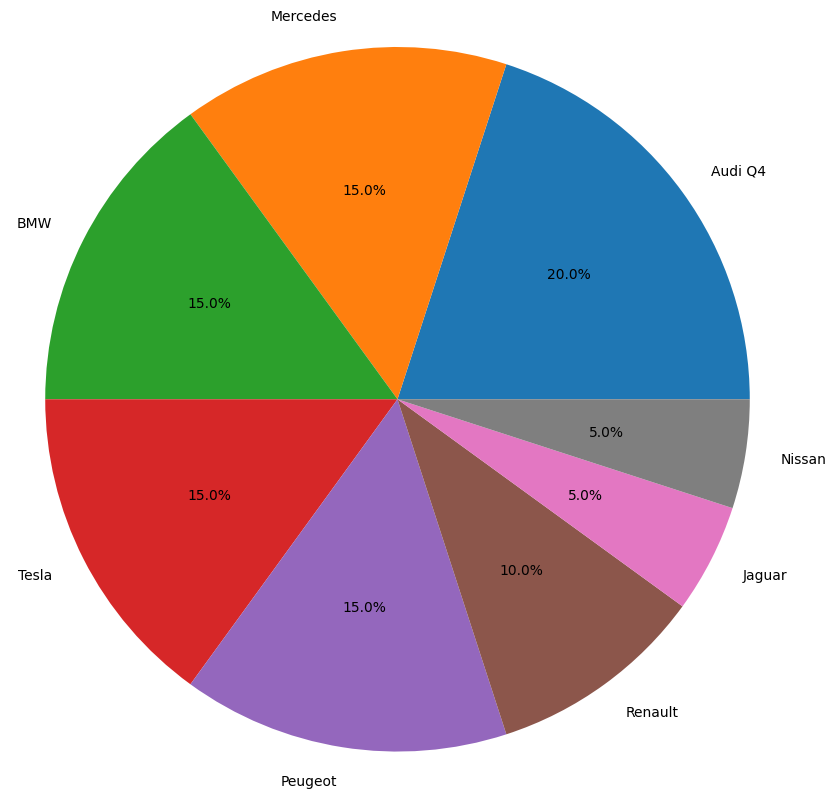

In [13]:
# Plot the population brand in a pie chart

# Values of each group
plt.figure(figsize=(10, 10))

brand_values = aggregator.simulation_dataframes['population']['brand'].value_counts()
plt.pie(brand_values, labels=brand_values.index, autopct='%1.1f%%')

# View the plot
plt.axis('equal')
plt.show()

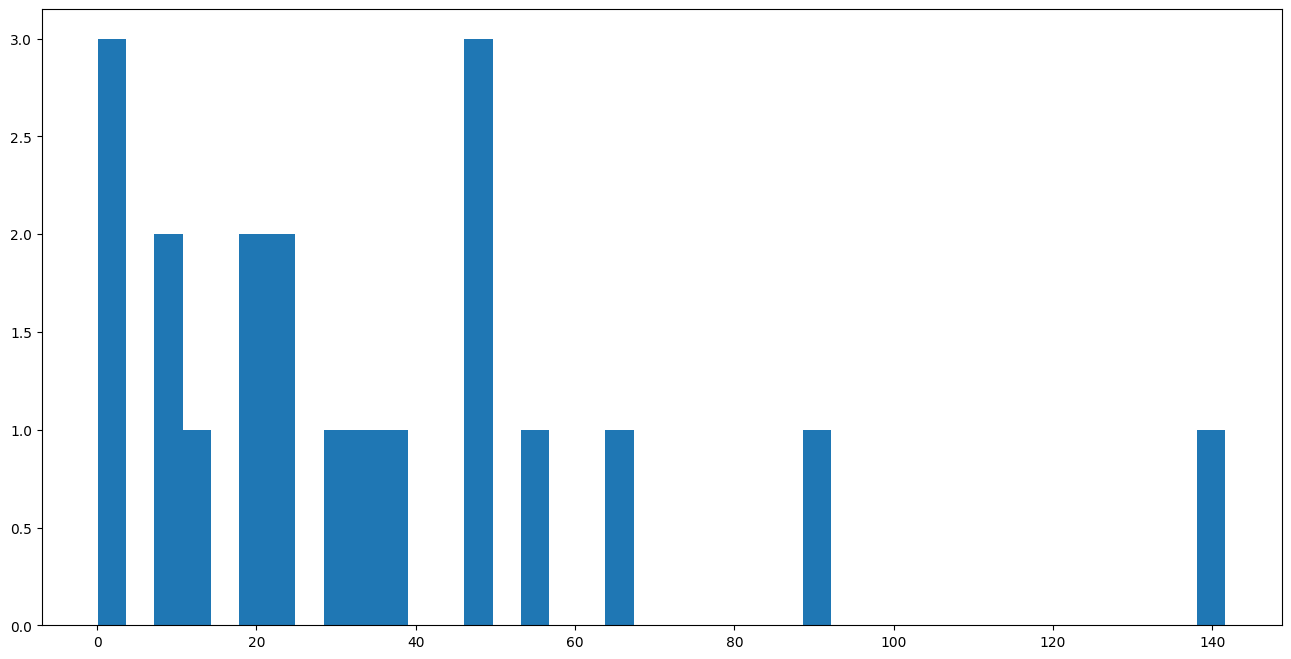

In [14]:
# Plot the trip distances in a histogram

plt.figure(figsize=(16, 8))

plt.hist(aggregator.simulation_dataframes['assigned_trips']['trip_length'], bins=40)
plt.show()

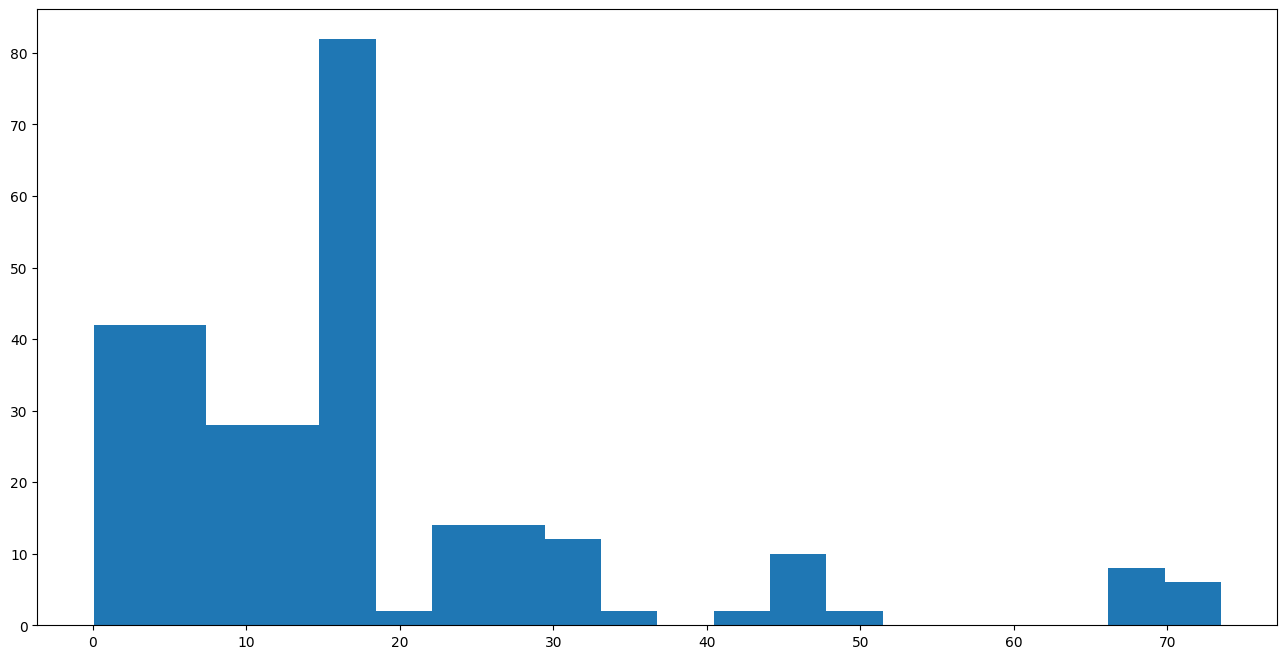

In [15]:
# Plot the segment distances in a histogram

plt.figure(figsize=(16, 8))

plt.hist(aggregator.simulation_dataframes['assigned_segments']['trip_length'], bins=20)
plt.show()

In [16]:
# Average trip distance

aggregator.simulation_dataframes['assigned_trips']['trip_length'].mean()

36.0315

In [17]:
# EV charging history

aggregator.simulation_dataframes['cs_history']

,start_time,end_time,start_soc,end_soc,ev_id,station_type,station_power
0,2023-01-01 18:35:19.431893,2023-01-01 18:41:50.886438,0.840519,0.984052,be0dd8958dc5719bae84bf95eba1010c,Residential Semi-fast CS2 (22 kW),22.0
1,2023-01-02 18:35:19.618749,2023-01-02 18:36:22.764204,0.974274,0.997427,be0dd8958dc5719bae84bf95eba1010c,Residential Semi-fast CS2 (22 kW),22.0
2,2023-01-03 18:35:19.395136,2023-01-03 18:35:49.346045,0.987798,0.998780,be0dd8958dc5719bae84bf95eba1010c,Residential Semi-fast CS2 (22 kW),22.0
3,2023-01-04 18:31:19.114850,2023-01-04 18:31:45.019032,0.989446,0.998945,be0dd8958dc5719bae84bf95eba1010c,Residential Semi-fast CS2 (22 kW),22.0
4,2023-01-05 18:30:19.755217,2023-01-05 18:30:45.981999,0.989315,0.998932,be0dd8958dc5719bae84bf95eba1010c,Residential Semi-fast CS2 (22 kW),22.0
...,...,...,...,...,...,...,...
131,2023-01-02 18:39:45.308971,2023-01-02 19:01:24.994156,0.957465,0.995746,4592ebed387ab8dfd9a5afad098c686a,Residential Slow CS1 (7.2 kW),7.2
132,2023-01-03 18:36:29.120851,2023-01-03 18:54:20.385666,0.964940,0.996494,4592ebed387ab8dfd9a5afad098c686a,Residential Slow CS1 (7.2 kW),7.2
133,2023-01-04 18:37:39.944644,2023-01-04 18:55:42.997051,0.964555,0.996455,4592ebed387ab8dfd9a5afad098c686a,Residential Slow CS1 (7.2 kW),7.2
134,2023-01-05 18:34:43.376920,2023-01-05 18:53:01.250062,0.964070,0.996407,4592ebed387ab8dfd9a5afad098c686a,Residential Slow CS1 (7.2 kW),7.2


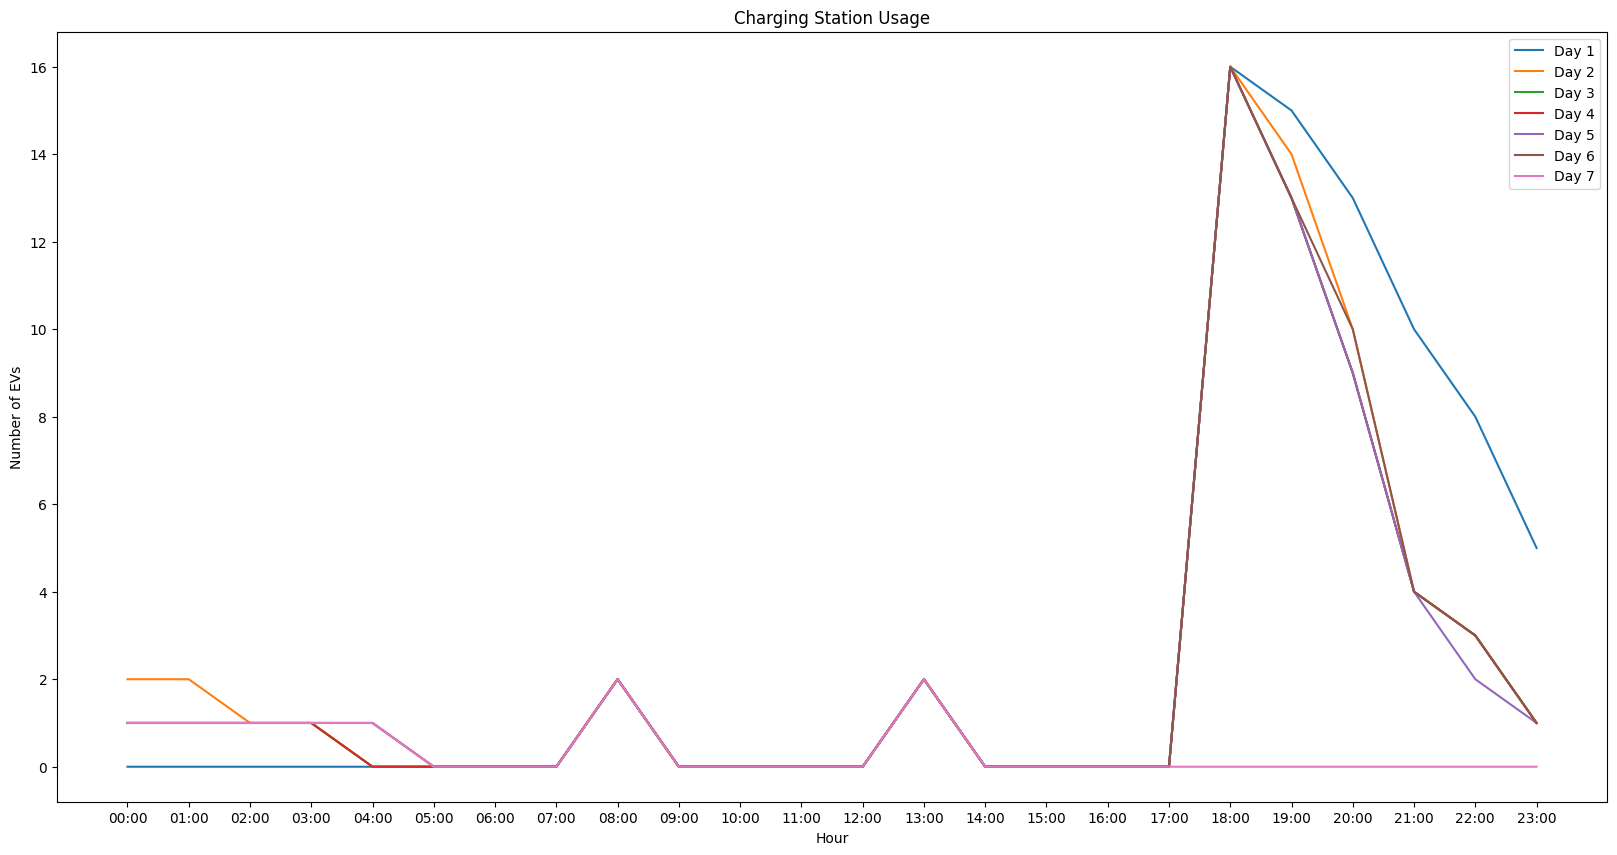

In [18]:
# Charging Station usage
# Pick a Day. If None, every day is plotted

DAY = None

# Create a figure
fig = plt.figure(figsize=(20, 10))

# Plot the data
if DAY is not None:
    plt.plot(np.sum(aggregator.simulation_dataframes['ev_charging_history'].transpose().loc[DAY].transpose() > 0, axis=0).ravel())
else:
    for i in range(1, aggregator.simulation_cycles + 1):
        plt.plot(np.sum(aggregator.simulation_dataframes['ev_charging_history'].transpose().loc['2023-01-{:02d}'.format(i)].transpose() > 0, axis=0).ravel())

# Set the title
plt.title('Charging Station Usage')

# Set the xticks to only hours in the format hh:mm
plt.xticks(np.arange(0, 24), ['{:02d}:00'.format(i) for i in range(24)])

# Set the x-axis label
plt.xlabel('Hour')

# Set the y-axis label
plt.ylabel('Number of EVs')

# Set the legend
if DAY is not None:
    plt.legend(['Day {}'.format(DAY)])
else:
    plt.legend(['Day {}'.format(i) for i in range(1, len(aggregator.simulation_dataframes) + 1)])

plt.show()

In [19]:
aggregator.simulation_dataframes['ev_charging_type']

,2023-01-01 00:00:00,2023-01-01 01:00:00,2023-01-01 02:00:00,2023-01-01 03:00:00,2023-01-01 04:00:00,2023-01-01 05:00:00,2023-01-01 06:00:00,2023-01-01 07:00:00,2023-01-01 08:00:00,2023-01-01 09:00:00,...,2023-01-07 14:00:00,2023-01-07 15:00:00,2023-01-07 16:00:00,2023-01-07 17:00:00,2023-01-07 18:00:00,2023-01-07 19:00:00,2023-01-07 20:00:00,2023-01-07 21:00:00,2023-01-07 22:00:00,2023-01-07 23:00:00
be0dd8958dc5719bae84bf95eba1010c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73028d22a49bffd9e9071ddeae8de183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59157a167e1d27e80467637f7801a643,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6bcb8042ecadb6dad6e68c179f5a8610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8532f5e43c25905df24c90ad5a7c895e,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
c4c98908abf24300e04dd5fe7841680a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2d8aa82a59ef2198397c13b81d810b7f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a16117d18cfb1525f2a35b7dc8b6e5f4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
e13a7a8ebfed4e24d29828d0716b15bc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3cda55e679a61dee877c3e7f7c822550,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Build a dictionary with the keys of the charging station as names and colors as values

cs_all_stations = PUBLIC_STATIONS + PRIVATE_STATIONS + RESIDENTIAL_CS1 + RESIDENTIAL_CS2
cs_colors = {cs.charging_station_type: cs.color for i, cs in enumerate(cs_all_stations)}
cs_colors

{'Public Ultrafast (150 kW)': 'orange',
 'Public Fast (50 kW)': 'red',
 'Public Semi-fast (22 kW)': 'blue',
 'Public Slow (7.2 kW)': 'green',
 'Private Fast (50 kW)': 'purple',
 'Private Semi-fast (22 kW)': 'mediumpurple',
 'Residential Slow CS1 (3.6 kW)': 'grey',
 'Residential Slow CS1 (7.2 kW)': 'silver',
 'Residential Slow CS2 (3.6 kW)': 'yellow',
 'Residential Slow CS2 (7.2 kW)': 'cyan',
 'Residential Semi-fast CS2 (22 kW)': 'lightgreen'}

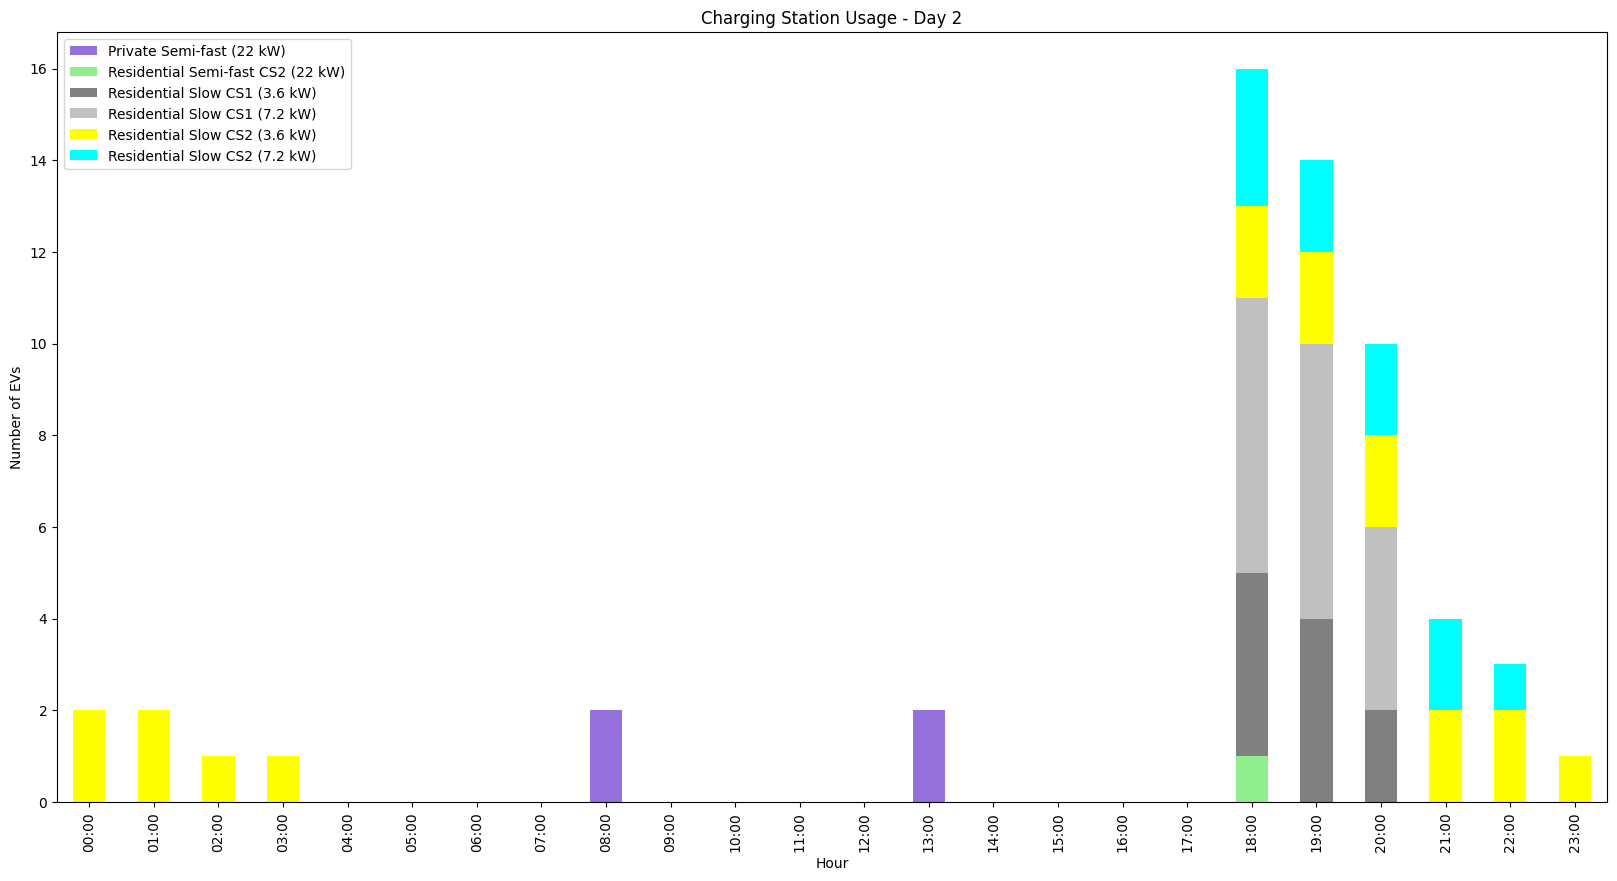

In [21]:
 # Plot a stacked bar chart of the ev_charging_history_type_hourly DataFrame

DAY = 2

# Get the value counts of each charging type at each hour
ev_charging_history_type_hourly_value_counts = aggregator.simulation_dataframes['ev_charging_type'].transpose().loc['2023-01-{:02d}'.format(DAY)].transpose().apply(pd.value_counts, axis=0)
ev_charging_history_type_hourly_value_counts.drop(0, inplace=True)
ev_charging_history_type_hourly_value_counts = ev_charging_history_type_hourly_value_counts.fillna(0)

# Set the colors to use according to the charging stations in the data
color_it = cycle(cs_colors.values())
color_map = [next(color_it) for i in range(len(ev_charging_history_type_hourly_value_counts.transpose().columns))]

# Plot the data using a stacked bar chart of the transposed DataFrame. Colors must match the ones in the cs_colors dictionary
ev_charging_history_type_hourly_value_counts.transpose().plot(kind='bar', stacked=True, figsize=(20, 10),
                                                              color=cs_colors)

# Set the color of the bars to match the colors in the cs_colors dictionary
# plt.gca().set_prop_cycle('color', [cs_colors[cs] for cs in ev_charging_history_type_hourly_value_counts.transpose().columns])

# Set the xticks to only hours in the format hh:mm
plt.xticks(np.arange(0, 24), ['{:02d}:00'.format(i) for i in range(24)])

# Set the title
plt.title('Charging Station Usage - Day {}'.format(DAY))

# Set the x-axis label
plt.xlabel('Hour')

# Set the y-axis label
plt.ylabel('Number of EVs')

plt.show()

In [22]:
ev_charging_history_type_hourly_value_counts

,2023-01-02 00:00:00,2023-01-02 01:00:00,2023-01-02 02:00:00,2023-01-02 03:00:00,2023-01-02 04:00:00,2023-01-02 05:00:00,2023-01-02 06:00:00,2023-01-02 07:00:00,2023-01-02 08:00:00,2023-01-02 09:00:00,...,2023-01-02 14:00:00,2023-01-02 15:00:00,2023-01-02 16:00:00,2023-01-02 17:00:00,2023-01-02 18:00:00,2023-01-02 19:00:00,2023-01-02 20:00:00,2023-01-02 21:00:00,2023-01-02 22:00:00,2023-01-02 23:00:00
Private Semi-fast (22 kW),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Residential Semi-fast CS2 (22 kW),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Residential Slow CS1 (3.6 kW),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,4.0,2.0,0.0,0.0,0.0
Residential Slow CS1 (7.2 kW),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,6.0,4.0,0.0,0.0,0.0
Residential Slow CS2 (3.6 kW),2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0
Residential Slow CS2 (7.2 kW),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,2.0,2.0,1.0,0.0


In [23]:
# Calculate the power used by each charging station

cs_power_usage = ev_charging_history_type_hourly_value_counts.copy(deep=True)
for idx in range(cs_power_usage.shape[0]):
    const_multiplier = float(cs_power_usage.index[idx].split('(')[1].split(' ')[0])

    cs_power_usage.iloc[idx] = cs_power_usage.iloc[idx] * const_multiplier

cs_power_usage

,2023-01-02 00:00:00,2023-01-02 01:00:00,2023-01-02 02:00:00,2023-01-02 03:00:00,2023-01-02 04:00:00,2023-01-02 05:00:00,2023-01-02 06:00:00,2023-01-02 07:00:00,2023-01-02 08:00:00,2023-01-02 09:00:00,...,2023-01-02 14:00:00,2023-01-02 15:00:00,2023-01-02 16:00:00,2023-01-02 17:00:00,2023-01-02 18:00:00,2023-01-02 19:00:00,2023-01-02 20:00:00,2023-01-02 21:00:00,2023-01-02 22:00:00,2023-01-02 23:00:00
Private Semi-fast (22 kW),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Residential Semi-fast CS2 (22 kW),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0
Residential Slow CS1 (3.6 kW),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,14.4,14.4,7.2,0.0,0.0,0.0
Residential Slow CS1 (7.2 kW),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,43.2,43.2,28.8,0.0,0.0,0.0
Residential Slow CS2 (3.6 kW),7.2,7.2,3.6,3.6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.2,7.2,7.2,7.2,7.2,3.6
Residential Slow CS2 (7.2 kW),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,21.6,14.4,14.4,14.4,7.2,0.0


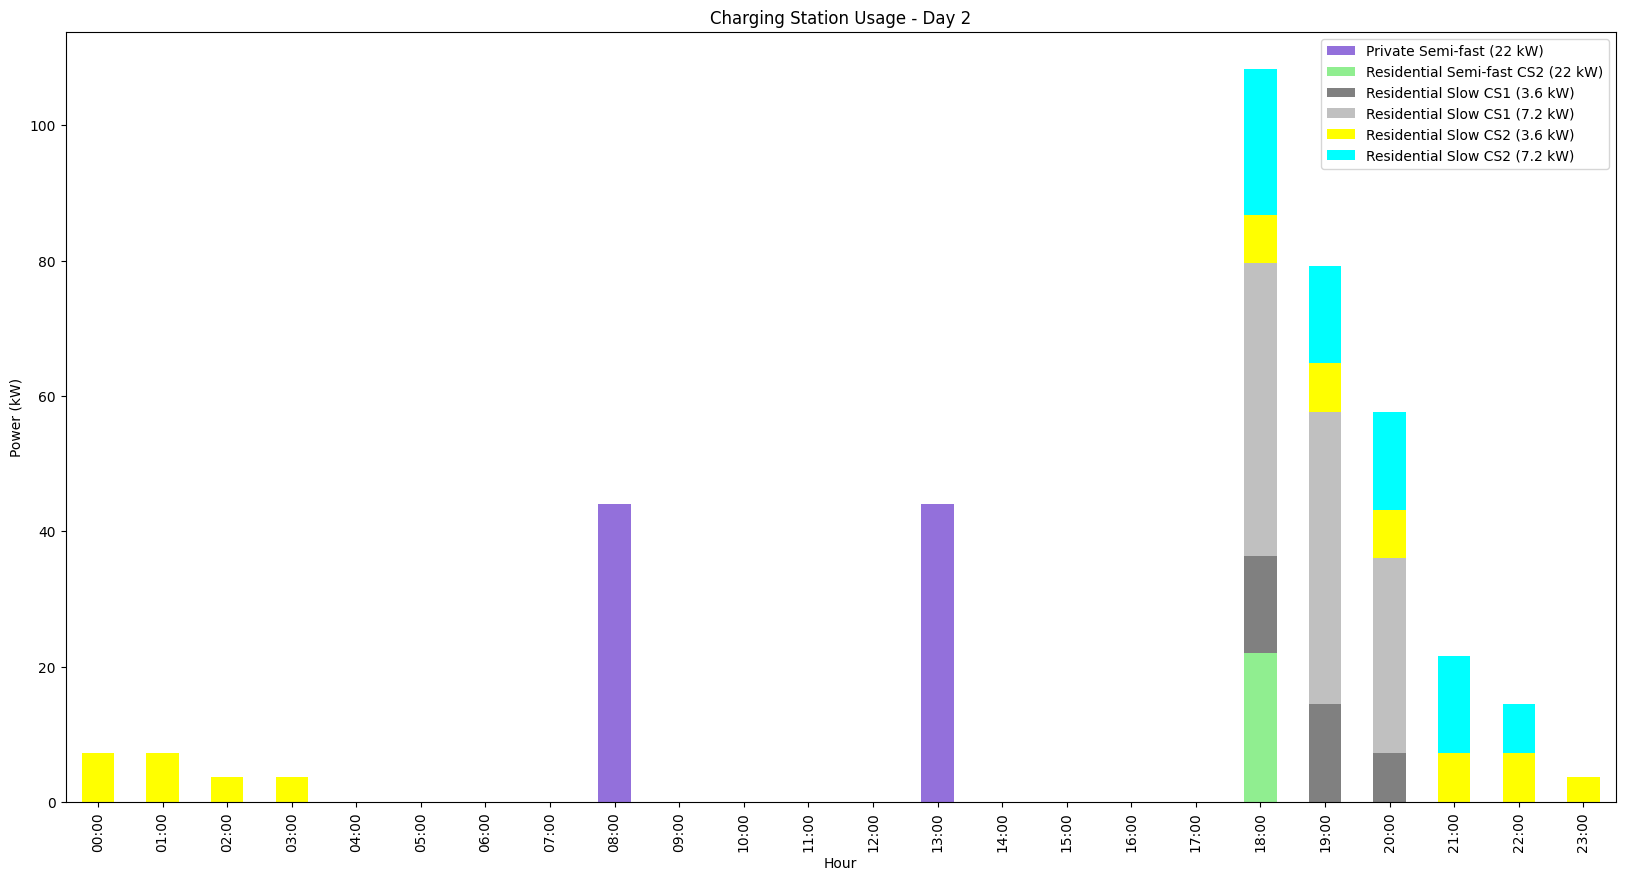

In [24]:
 # Plot a stacked bar chart of the ev_charging_history_type_hourly DataFrame

# Set the colors to use according to the charging stations in the data
color_it = cycle(cs_colors.values())
color_map = [next(color_it) for i in range(len(ev_charging_history_type_hourly_value_counts.transpose().columns))]

# Plot the data using a stacked bar chart of the transposed DataFrame. Colors must match the ones in the cs_colors dictionary
cs_power_usage.transpose().plot(kind='bar', stacked=True, figsize=(20, 10),
                                color=cs_colors)

# Set the xticks to only hours in the format hh:mm
plt.xticks(np.arange(0, 24), ['{:02d}:00'.format(i) for i in range(24)])

# Set the title
plt.title('Charging Station Usage - Day {}'.format(DAY))

# Set the x-axis label
plt.xlabel('Hour')

# Set the y-axis label
plt.ylabel('Power (kW)')

plt.show()

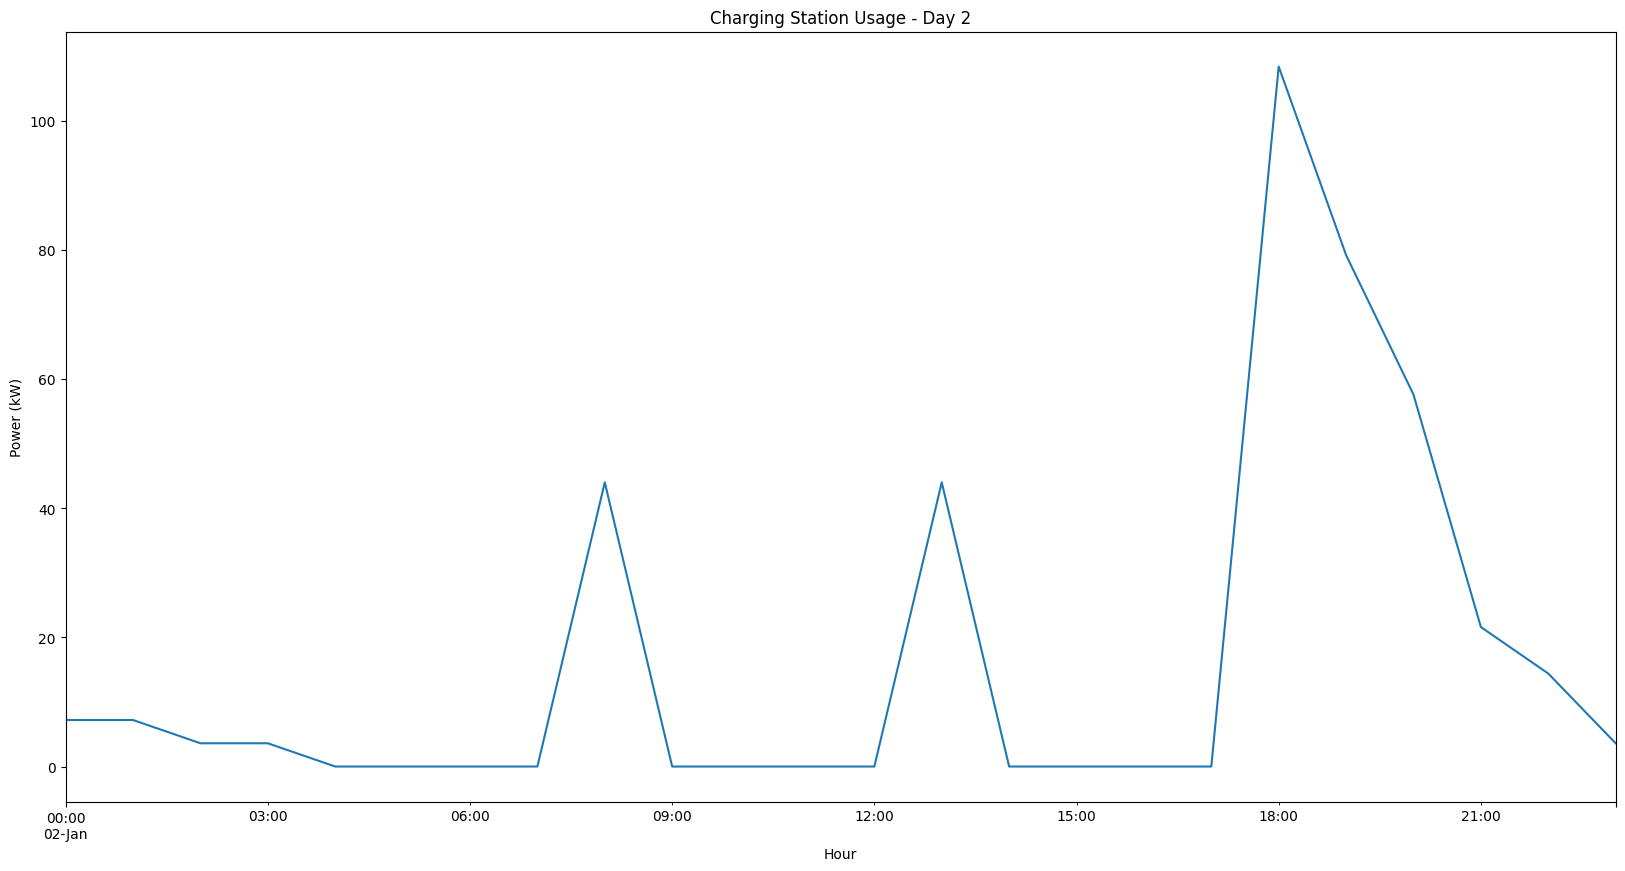

In [25]:
# Plot of the total power used by the charging stations

cs_power_usage.sum().plot(figsize=(20, 10))

# Set the title
plt.title('Charging Station Usage - Day {}'.format(DAY))

# Set the x-axis label
plt.xlabel('Hour')

# Set the y-axis label
plt.ylabel('Power (kW)')

plt.show()

In [26]:
# EV Stopped History

aggregator.simulation_dataframes['ev_stopped']

,2023-01-01 00:00:00,2023-01-01 01:00:00,2023-01-01 02:00:00,2023-01-01 03:00:00,2023-01-01 04:00:00,2023-01-01 05:00:00,2023-01-01 06:00:00,2023-01-01 07:00:00,2023-01-01 08:00:00,2023-01-01 09:00:00,...,2023-01-07 14:00:00,2023-01-07 15:00:00,2023-01-07 16:00:00,2023-01-07 17:00:00,2023-01-07 18:00:00,2023-01-07 19:00:00,2023-01-07 20:00:00,2023-01-07 21:00:00,2023-01-07 22:00:00,2023-01-07 23:00:00
be0dd8958dc5719bae84bf95eba1010c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73028d22a49bffd9e9071ddeae8de183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59157a167e1d27e80467637f7801a643,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6bcb8042ecadb6dad6e68c179f5a8610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8532f5e43c25905df24c90ad5a7c895e,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
c4c98908abf24300e04dd5fe7841680a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2d8aa82a59ef2198397c13b81d810b7f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a16117d18cfb1525f2a35b7dc8b6e5f4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
e13a7a8ebfed4e24d29828d0716b15bc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3cda55e679a61dee877c3e7f7c822550,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Check when the EVs are stopped

stopped_df = aggregator.simulation_dataframes['ev_stopped'].apply(pd.value_counts, axis=0)
stopped_df.fillna(0, inplace=True)
stopped_df = stopped_df.transpose()
stopped_df.columns = ['Driving', 'Stopped']

stopped_df

,Driving,Stopped
2023-01-01 00:00:00,20.0,0.0
2023-01-01 01:00:00,20.0,0.0
2023-01-01 02:00:00,20.0,0.0
2023-01-01 03:00:00,20.0,0.0
2023-01-01 04:00:00,20.0,0.0
...,...,...
2023-01-07 19:00:00,20.0,0.0
2023-01-07 20:00:00,20.0,0.0
2023-01-07 21:00:00,20.0,0.0
2023-01-07 22:00:00,20.0,0.0


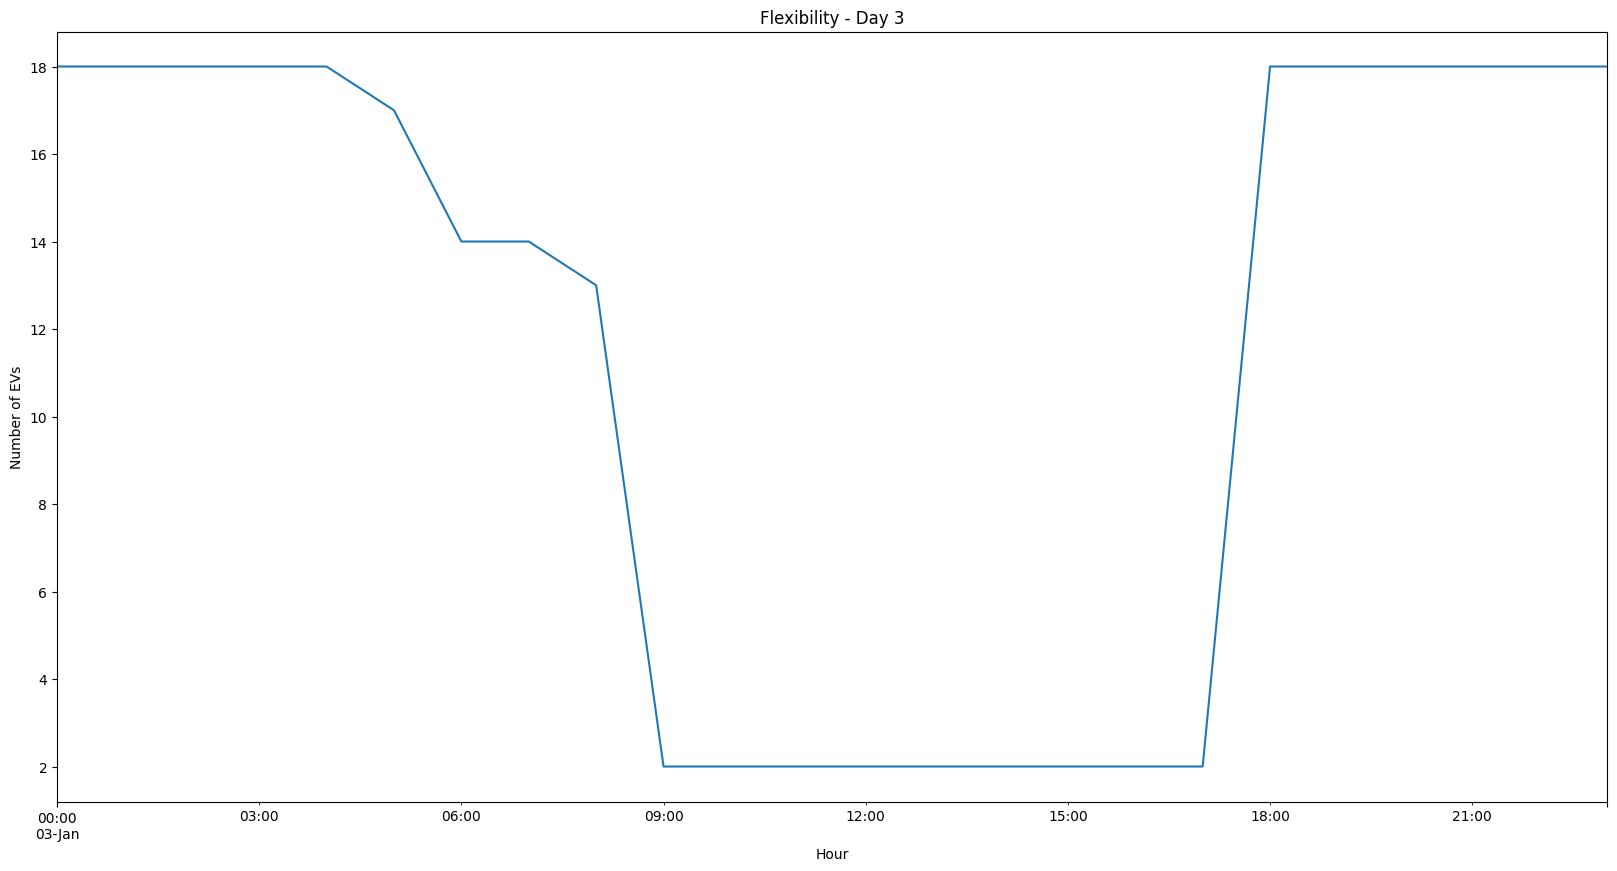

In [28]:
# Plot a stacked bar chart of the ev_stopped DataFrame

DAY = 3

plt.figure(figsize=(20, 10))

# Get the value counts of each charging type at each hour
np.sum(aggregator.simulation_dataframes['ev_flexibility'].transpose().loc['2023-01-{:02d}'.format(DAY)], axis=1).plot()

# Set the title
plt.title('Flexibility - Day {}'.format(DAY))

# Set the x-axis label
plt.xlabel('Hour')

# Set the y-axis label
plt.ylabel('Number of EVs')

# Set the y-axis to an integer
#plt.yticks(np.arange(0, aggregator.number_of_evs))

plt.show()

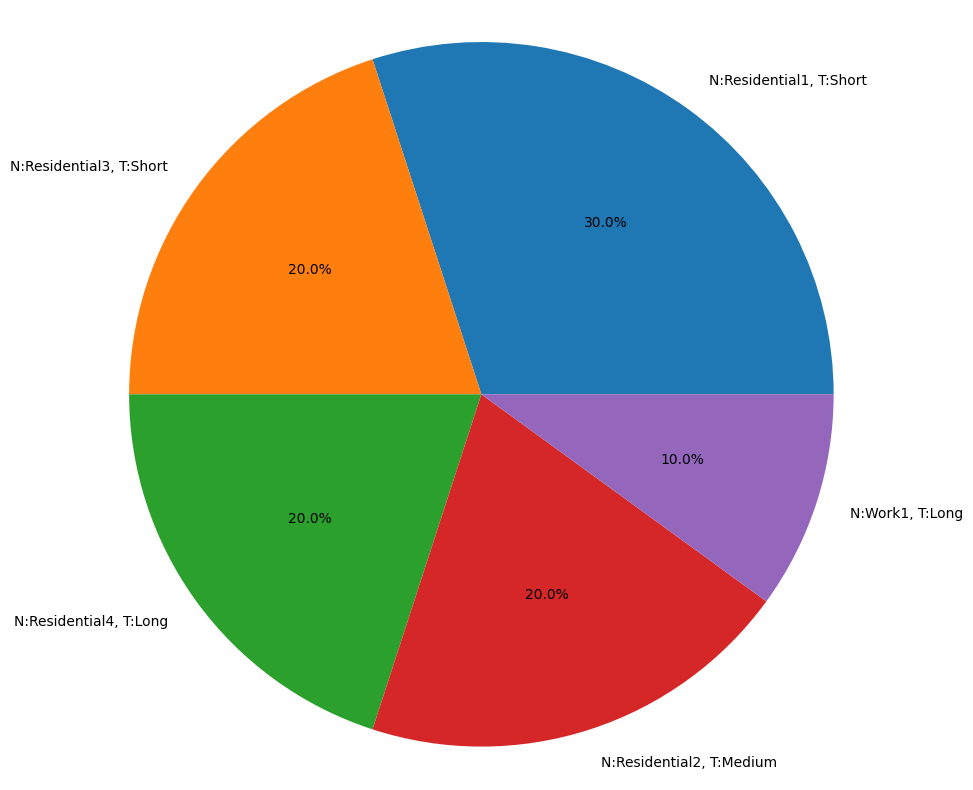

In [29]:
# Plot a pie chart of the user profiles

plt.figure(figsize=(10, 10))

# Values of each group
profile_values = aggregator.simulation_dataframes['population']['user_profile'].value_counts()
plt.pie(profile_values, labels=profile_values.index, autopct='%1.1f%%')

# View the plot
plt.axis('equal')

plt.show()

In [30]:
# Flexibility power

aggregator.simulation_dataframes['ev_flexibility_power']

,2023-01-01 00:00:00,2023-01-01 01:00:00,2023-01-01 02:00:00,2023-01-01 03:00:00,2023-01-01 04:00:00,2023-01-01 05:00:00,2023-01-01 06:00:00,2023-01-01 07:00:00,2023-01-01 08:00:00,2023-01-01 09:00:00,...,2023-01-07 14:00:00,2023-01-07 15:00:00,2023-01-07 16:00:00,2023-01-07 17:00:00,2023-01-07 18:00:00,2023-01-07 19:00:00,2023-01-07 20:00:00,2023-01-07 21:00:00,2023-01-07 22:00:00,2023-01-07 23:00:00
be0dd8958dc5719bae84bf95eba1010c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73028d22a49bffd9e9071ddeae8de183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59157a167e1d27e80467637f7801a643,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6bcb8042ecadb6dad6e68c179f5a8610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8532f5e43c25905df24c90ad5a7c895e,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
c4c98908abf24300e04dd5fe7841680a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2d8aa82a59ef2198397c13b81d810b7f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a16117d18cfb1525f2a35b7dc8b6e5f4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
e13a7a8ebfed4e24d29828d0716b15bc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3cda55e679a61dee877c3e7f7c822550,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# Save all the simulation dataframes to a individual CSV files

import os

# Create the directory
if not os.path.exists('simulation_dataframes'):
    os.makedirs('simulation_dataframes')

for current_df in aggregator.simulation_dataframes.keys():
    aggregator.simulation_dataframes[current_df].to_csv('simulation_dataframes/{}_{}.csv'.format(current_df, aggregator.simulation_cycles))